In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the InceptionV3 model with ImageNet weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the pre-trained layers
base_model.trainable = True # Set this to True if you want to fine-tune

# Step 3: Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add Global Average Pooling
x = Dropout(0.5)(x)  # Optional: Add a Dropout layer for regularization
x = Dense(1024, activation='relu')(x)  # Dense layer
predictions = Dense(2, activation='softmax')(x)  # Adjust the number of classes as needed

# Step 4: Create the model
model = Model(inputs=base_model.input, outputs=predictions)



In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 23,868,578 (91.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [3]:
# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Set up data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/Users/jaeeponde/tai_final_project/rvf_subset_5000/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# If you have validation data:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/Users/jaeeponde/tai_final_project/rvf_subset_5000/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Step 7: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6389 - loss: 0.6433

/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 702s 7s/step - accuracy: 0.6396 - loss: 0.6426 - val_accuracy: 0.7278 - val_loss: 0.6765
Epoch 2/10
 1/93 ━━━━━━━━━━━━━━━━━━━━ 10:09 7s/step - accuracy: 0.6875 - loss: 0.4827

/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


93/93 ━━━━━━━━━━━━━━━━━━━━ 55s 526ms/step - accuracy: 0.6875 - loss: 0.4827 - val_accuracy: 0.7339 - val_loss: 0.6564
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 675s 7s/step - accuracy: 0.8479 - loss: 0.3478 - val_accuracy: 0.8579 - val_loss: 0.3651
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 57s 553ms/step - accuracy: 0.9062 - loss: 0.1680 - val_accuracy: 0.8518 - val_loss: 0.3990
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 692s 7s/step - accuracy: 0.9361 - loss: 0.1707 - val_accuracy: 0.9083 - val_loss: 0.2787
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 57s 532ms/step - accuracy: 1.0000 - loss: 0.0563 - val_accuracy: 0.9052 - val_loss: 0.2783
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 694s 7s/step - accuracy: 0.9367 - loss: 0.1673 - val_accuracy: 0.6522 - val_loss: 1.5033
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 62s 584ms/step - accuracy: 0.8438 - loss: 0.3447 - val_accuracy: 0.6573 - val_loss: 1.4712
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 874s 9s/step - accuracy: 0.9432 - loss: 0.1594 - val_accuracy: 0.8548 - val_

ValueError: Argument(s) not recognized: {'lr': 1e-05}

In [5]:
# Step 10: Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"\nFinal Validation Loss: {val_loss:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

# Step 11: Save the trained model
model.save("fine_tuned_model.h5")
print("Model saved to 'fine_tuned_model.h5'")


32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8450 - loss: 0.4266



Final Validation Loss: 0.3950
Final Validation Accuracy: 0.8560
Model saved to 'fine_tuned_model.h5'


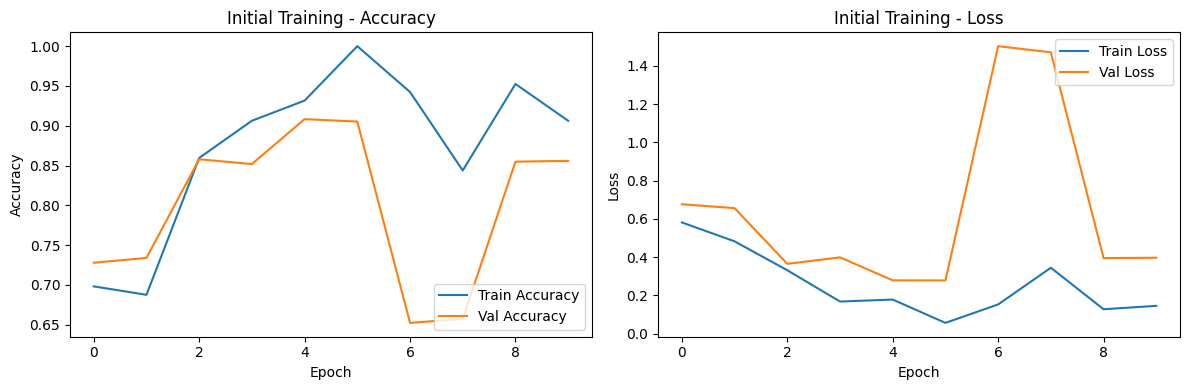

In [6]:
import matplotlib.pyplot as plt

def plot_training_history(history, title='Initial Training'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function for initial training
plot_training_history(history)



In [7]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Accuracy: 0.9062
Final Validation Accuracy: 0.8558


In [11]:
test_generator = train_datagen.flow_from_directory(
    '/Users/jaeeponde/tai_final_project/rvf_subset_5000/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1000 images belonging to 2 classes.


In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7960 - loss: 0.6168
Test Loss: 0.3816
Test Accuracy: 0.8700
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step

Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.76      0.85       500
        real       0.80      0.97      0.88       500

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



<Figure size 800x600 with 0 Axes>

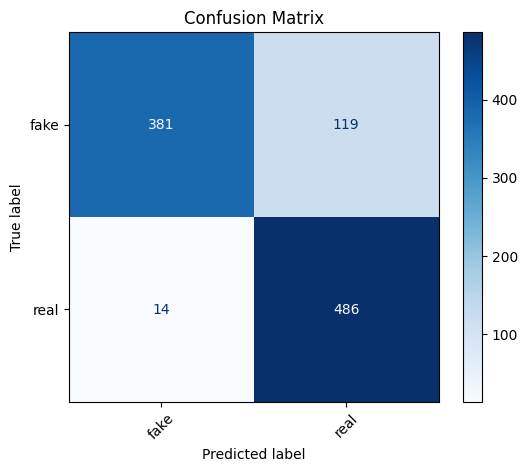

In [13]:
# 1. Run test images through the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 2. Predict labels
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)  # predicted class indices
true_classes = test_generator.classes     # true class indices
class_labels = list(test_generator.class_indices.keys())  # label names

# 3. Classification report
print("\nClassification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# 4. Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()